<a href="https://colab.research.google.com/github/ZuzannaNogala/MCARD/blob/master/MCARD_Nogala_l4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION TO NEURAL NETWORKS, PART 1

Zuzanna Nogala

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# keras
from keras.datasets import mnist

from keras.models import Sequential, Model
from keras.layers import Dense
from keras import optimizers
from sklearn.linear_model import LinearRegression
from datetime import datetime
# torch
import torch

!pip install torchinfo
from torchinfo import summary as torch_summary

Reconstructed images:


*   Row 1 = original images
*   Row 2 = PCA
*   Row 3 = AE_keras_small
*   Row 4 = AE_torch_small
*   Row 5 = AE_keras_larger
*   Row 6 = AE_torch_larger (to do)

# Q4.1 (10 pts)

* Implement the same/similar Autoencoder for mnist, but **in PyTorch** and repeat previous steps: display reduced points, display (as fifth row) reconstructed images etc.

In [3]:
# READ DATA
# 60000 images 28 x 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

n_samples_train, h, w = x_train.shape
n_samples_test, _, _ = x_test.shape

image_size = h*w

# 60000 images 28 * 28 = 784 (flatten) and normalised!
x_train = x_train.reshape(x_train.shape[0], 784) / 255
x_test = x_test.reshape(x_test.shape[0], 784) / 255

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

In [4]:
from torch.utils.data import DataLoader, TensorDataset

# PYTORCH LARGE IMPLEMENTATION
dataset = TensorDataset(x_train_tensor, x_train_tensor)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# ENCODER AND DECODER
torch_large_encoder = torch.nn.Sequential(
    torch.nn.Linear(784, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, 2),
)

torch_large_decoder = torch.nn.Sequential(
    torch.nn.Linear(2, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 784),
    torch.nn.Sigmoid(),
)

AE_torch_large = torch.nn.Sequential(
    torch_large_encoder,
    torch_large_decoder
)

In [5]:
loss_torch = torch.nn.MSELoss()
optimizer = torch.optim.Adam(AE_torch_large.parameters())

n_epochs = 15
for epoch in range(n_epochs):
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = AE_torch_large(inputs)
        loss = loss_torch(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.6f}")


x_train_torch_torch_encoded = torch_large_encoder(x_train_tensor)
x_train_torch_large_reconstr = AE_torch_large(x_train_tensor)

Epoch 1/15, Loss: 0.053232
Epoch 2/15, Loss: 0.044095
Epoch 3/15, Loss: 0.041762
Epoch 4/15, Loss: 0.040299
Epoch 5/15, Loss: 0.039284
Epoch 6/15, Loss: 0.038498
Epoch 7/15, Loss: 0.037984
Epoch 8/15, Loss: 0.037570
Epoch 9/15, Loss: 0.037184
Epoch 10/15, Loss: 0.036887
Epoch 11/15, Loss: 0.036581
Epoch 12/15, Loss: 0.036380
Epoch 13/15, Loss: 0.036176
Epoch 14/15, Loss: 0.035978
Epoch 15/15, Loss: 0.035805


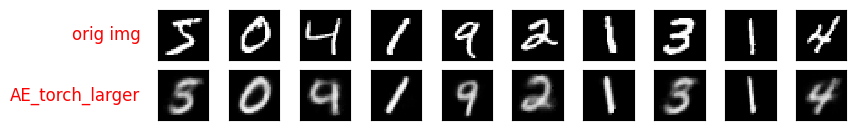

In [6]:
toPlot = (x_train, x_train_torch_large_reconstr.detach().numpy())
textRows = ["orig img", "AE_torch_larger"]

plt.figure(figsize=(9, 3))

for i in range(10):
    for j in range(2):
        ax = plt.subplot(4, 10, 10*j+i+1)
        plt.imshow(np.array(toPlot[j][i, :]).reshape(28, 28), interpolation="nearest",
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.text(-0.35, 0.5, textRows[j],
                    transform=ax.transAxes,
                    fontsize=12,
                    va='center',
                    ha='right',
                    color='red')

plt.show()

# Q4.2 (10 pts)
* construct an Autoencoder using PyTorch) with a bottleneck of $r=3$ neurons.
Use the bottleneck features to visualize the data (MNIST) in 3D and display the resulting 3D scatter plots side by side with a 3D PCA reduction.
Display also several reconstructed images (PCA vs AE). Compute reconstruction error.

* For some fixed $r>3$ do the same -- display reconstructed images and compute reconstruction error (compare the latter to previoues $r=2, r=3$ cases)

In [7]:
# PYTORCH AUTOENCODER r=3 in BOOTLENECK LAYER
r = 3

torch_large_encoder_3 = torch.nn.Sequential(
    torch.nn.Linear(784, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, r),
)

torch_large_decoder_3 = torch.nn.Sequential(
    torch.nn.Linear(r, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 784),
    torch.nn.Sigmoid(),
)

AE_torch_large_3 = torch.nn.Sequential(
    torch_large_encoder_3,
    torch_large_decoder_3
)

In [8]:
optimizer_3 = torch.optim.Adam(AE_torch_large_3.parameters())

n_epochs = 5
for epoch in range(n_epochs):
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer_3.zero_grad()
        outputs = AE_torch_large_3(inputs)
        loss = loss_torch(outputs, targets)
        loss.backward()
        optimizer_3.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.6f}")

x_train_torch_encoded_3 = torch_large_encoder_3(x_train_tensor).detach().numpy()
x_train_torch_reconstr_3 = AE_torch_large_3(x_train_tensor)

Epoch 1/5, Loss: 0.050200
Epoch 2/5, Loss: 0.038761
Epoch 3/5, Loss: 0.036065
Epoch 4/5, Loss: 0.034452
Epoch 5/5, Loss: 0.033431


In [9]:
# PYTORCH AUTOENCODER r=8 in BOOTLENECK LAYER
r = 8
torch_large_encoder_8 = torch.nn.Sequential(
    torch.nn.Linear(784, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, r),
)

torch_large_decoder_8 = torch.nn.Sequential(
    torch.nn.Linear(r, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 784),
    torch.nn.Sigmoid(),
)

AE_torch_large_8 = torch.nn.Sequential(
    torch_large_encoder_8,
    torch_large_decoder_8
)

In [10]:
optimizer_8 = torch.optim.Adam(AE_torch_large_8.parameters())

n_epochs = 5
for epoch in range(n_epochs):
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer_8.zero_grad()
        outputs = AE_torch_large_8(inputs)
        loss = loss_torch(outputs, targets)
        loss.backward()
        optimizer_8.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.6f}")


x_train_torch_encoded_8 = torch_large_encoder_8(x_train_tensor).detach().numpy()
x_train_torch_reconstr_8 = AE_torch_large_8(x_train_tensor)

Epoch 1/5, Loss: 0.039143
Epoch 2/5, Loss: 0.022561
Epoch 3/5, Loss: 0.019876
Epoch 4/5, Loss: 0.018422
Epoch 5/5, Loss: 0.017459


In [11]:
from sklearn.decomposition import PCA

# PCA - 2 components

model_PCA2 = PCA(n_components=2)
model_PCA2.fit(x_train)
points_train_PCA2 = model_PCA2.transform(x_train)
points_reconstructed2 = model_PCA2.inverse_transform(points_train_PCA2)

# PCA - 3 components

model_PCA3 = PCA(n_components=3)
model_PCA3.fit(x_train)
points_train_PCA3 = model_PCA3.transform(x_train)
points_reconstructed3 = model_PCA3.inverse_transform(points_train_PCA3)

# PCA - r = 8 components

model_PCA8 = PCA(n_components=8)
model_PCA8.fit(x_train)
points_train_PCA8 = model_PCA8.transform(x_train)
points_reconstructed8 = model_PCA8.inverse_transform(points_train_PCA8) # Transform data back to its original space

In [12]:
from sklearn.metrics import mean_squared_error

# Errors:
AE_torch_err_3 = mean_squared_error(x_train, x_train_torch_reconstr_3.detach().numpy())
AE_torch_err_8 = mean_squared_error(x_train, x_train_torch_reconstr_8.detach().numpy())
PCA_err_8 = mean_squared_error(x_train, points_reconstructed8)
PCA_err_3 = mean_squared_error(x_train, points_reconstructed3)
PCA_err_2 = mean_squared_error(x_train, points_reconstructed2)

# AE_torch_err_3 = np.sum((x_train-x_train_torch_reconstr_3.detach().numpy())**2)/(n_samples_train*image_size)
# AE_torch_err_8 = np.sum((x_train-x_train_torch_reconstr_8.detach().numpy())**2)/(n_samples_train*image_size)
# PCA_err_8 = np.sum((x_train-points_reconstructed8)**2)/(n_samples_train*image_size)
# PCA_err_3 = np.sum((x_train-points_reconstructed3)**2)/(n_samples_train*image_size)
# PCA_err_2 = np.sum((x_train-points_reconstructed2)**2)/(n_samples_train*image_size)

print(f"PCA reconstruction error (r = 2): {np.round(PCA_err_2, 3)}")
print(f"PCA reconstruction error (r = 3): {np.round(PCA_err_3, 3)}")
print(f"PCA reconstruction error (r = 8): {np.round(PCA_err_8, 3)}")
print(f"Autoencoder reconstruction error (r = 3): {np.round(AE_torch_err_3, 3)}")
print(f"Autoencoder reconstruction error (r = 8): {np.round(AE_torch_err_8, 3)}")

PCA reconstruction error (r = 2): 0.056
PCA reconstruction error (r = 3): 0.052
PCA reconstruction error (r = 8): 0.038
Autoencoder reconstruction error (r = 3): 0.033
Autoencoder reconstruction error (r = 8): 0.017


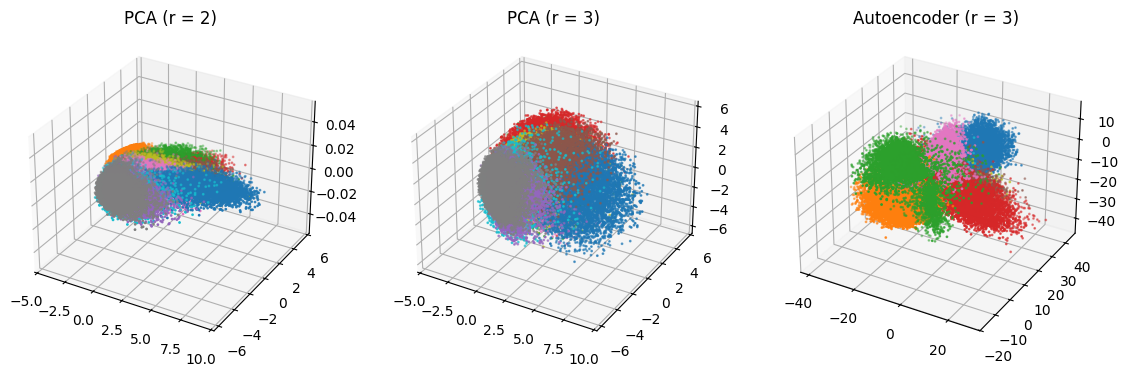

In [13]:
fig = plt.figure(figsize=(14, 10))
ax_PCA2 = fig.add_subplot(1, 3, 1, projection='3d')
ax_PCA2.set_title("PCA (r = 2)")
ax_PCA3 = fig.add_subplot(1, 3, 2, projection='3d')
ax_PCA3.set_title("PCA (r = 3)")

for label in range(len(np.unique(y_train))):
    points_PCA_2 = points_train_PCA2[y_train == label]
    ax_PCA2.scatter(points_PCA_2[:, 0], points_PCA_2[:, 1], s=1)

    points_PCA_3 = points_train_PCA3[y_train == label]
    ax_PCA3.scatter(points_PCA_3[:, 0], points_PCA_3[:, 1], points_PCA_3[:, 2], s=1)

ax_AE = fig.add_subplot(1, 3, 3, projection='3d')

for label in range(len(np.unique(y_train))):
    points_AE = x_train_torch_encoded_3[y_train == label]
    ax_AE.scatter(points_AE[:, 0], points_AE[:, 1], points_AE[:, 2], s=1)

ax_AE.set_title("Autoencoder (r = 3)")
plt.show()

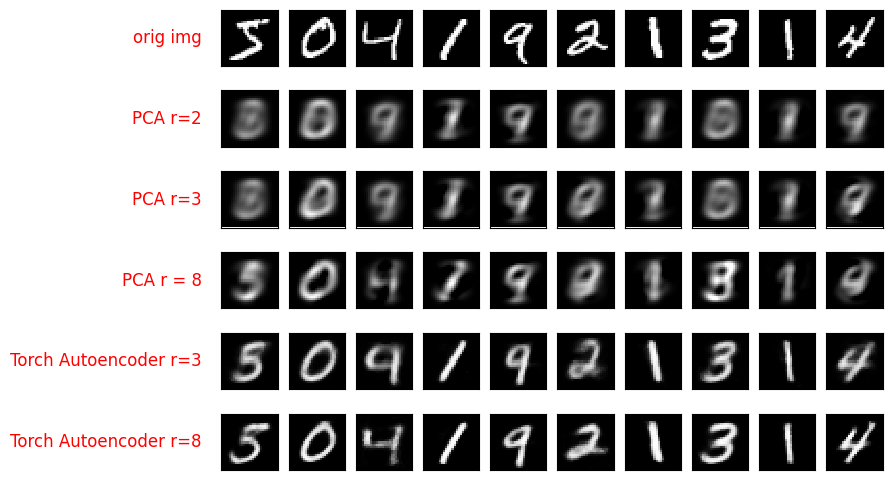

In [14]:
toPlot = (x_train, points_reconstructed2,  points_reconstructed3, points_reconstructed8,
          x_train_torch_reconstr_3.detach().numpy(), x_train_torch_reconstr_8.detach().numpy())
text_rows = ["orig img", "PCA r=2", "PCA r=3", "PCA r = 8", "Torch Autoencoder r=3", "Torch Autoencoder r=8"]

nRows = len(toPlot)   # Should be 3
nCols = 10            # Number of images per row

plt.figure(figsize=(9, 5))

for j in range(nRows):
    for i in range(nCols):
        ax = plt.subplot(nRows, nCols, j*nCols + i + 1)
        # Reshape each image (assumed to be flattened 28x28) and show.
        plt.imshow(np.array(toPlot[j][i, :]).reshape(28, 28), interpolation="nearest", vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # Add row label on the first column of each row.
        if i == 0:
            ax.text(-0.35, 0.5, text_rows[j],
                    transform=ax.transAxes,
                    fontsize=12,
                    va='center',
                    ha='right',
                    color='red')

plt.tight_layout()
plt.show()

# Q4.3 (10 pts)
* Construct Autoencoder (similar to AE_torch_larger, but may have larger $r$ -- this is a paramter, set initially $r=10$) so that: on input it gets noisy images from training set (i.e., `x_train_noisy`), the output is compared to original unnoised image (i.e., from `x_train`, use `mean_squared_error`).
* Display some of your denoised images
* Unnoise images `x_test_noisy` and compare (MSE) with `x_test`
* Play around: try different number of hidden layers, different activation functions, etc. For your best network try to apply it for larger values of `noise_level`

In [15]:
noise_level = 0.25

x_train_noisy = x_train + noise_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy_tensor = torch.tensor(x_train_noisy, dtype=torch.float32)
x_test_noisy_tensor = torch.tensor(x_test_noisy, dtype=torch.float32)

In [28]:
# PYTORCH AUTOENCODER r=10 in BOOTLENECK LAYER
r = 10

# TensorDataset(inputs, targets)
dataset = TensorDataset(x_train_noisy_tensor, x_train_tensor) #
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

torch_large_encoder_10 = torch.nn.Sequential(
    torch.nn.Linear(784, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, r),
)

torch_large_decoder_10 = torch.nn.Sequential(
    torch.nn.Linear(r, 128),
    torch.nn.ELU(),
    torch.nn.Linear(128, 512),
    torch.nn.ELU(),
    torch.nn.Linear(512, 784),
    torch.nn.Sigmoid(),
)

AE_torch_large_10 = torch.nn.Sequential(
    torch_large_encoder_10,
    torch_large_decoder_10
)

In [29]:
optimizer_10 = torch.optim.Adam(AE_torch_large_10.parameters())

n_epochs = 6
for epoch in range(n_epochs):
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer_10.zero_grad()
        outputs = AE_torch_large_10(inputs)
        loss = loss_torch(outputs, targets)
        loss.backward()
        optimizer_10.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.6f}")


x_train_torch_encoded_10 = torch_large_encoder_10(x_train_noisy_tensor).detach().numpy()
x_train_torch_reconstr_10 = AE_torch_large_10(x_train_noisy_tensor)
x_train_torch_reconstr_np_10 = x_train_torch_reconstr_10.detach().numpy()

Epoch 1/6, Loss: 0.040253
Epoch 2/6, Loss: 0.022951
Epoch 3/6, Loss: 0.019958
Epoch 4/6, Loss: 0.018359
Epoch 5/6, Loss: 0.017312
Epoch 6/6, Loss: 0.016538


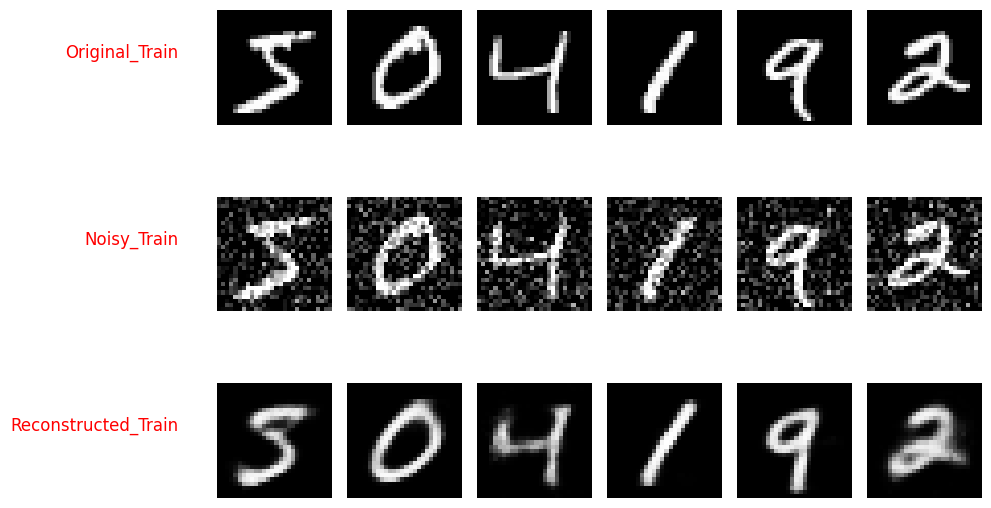

In [36]:
plt.figure(figsize=(10, 6))
row_titles = ['Original_Train', 'Noisy_Train', 'Reconstructed_Train']

for i in range(6):
    # Original image
    ax = plt.subplot(3, 6, i + 1)
    if i == 0:
        ax.text(-10, 10, row_titles[0], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(x_train[i].reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

    # Noisy image
    ax = plt.subplot(3, 6, i + 7)
    if i == 0:
        ax.text(-10, 10, row_titles[1], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(x_train_noisy[i].reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, 6, i + 13)
    if i == 0:
        ax.text(-10, 10, row_titles[2], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(np.array(x_train_torch_reconstr_np_10[i]).reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [31]:
x_test_reconstr_10 = AE_torch_large_10(x_test_noisy_tensor)

print(f"MSE train: {loss_torch(x_train_tensor, x_train_torch_reconstr_10)}")
print(f"MSE test: {loss_torch(x_test_tensor, x_test_reconstr_10)}")

MSE train: 0.015844659879803658
MSE test: 0.016506602987647057


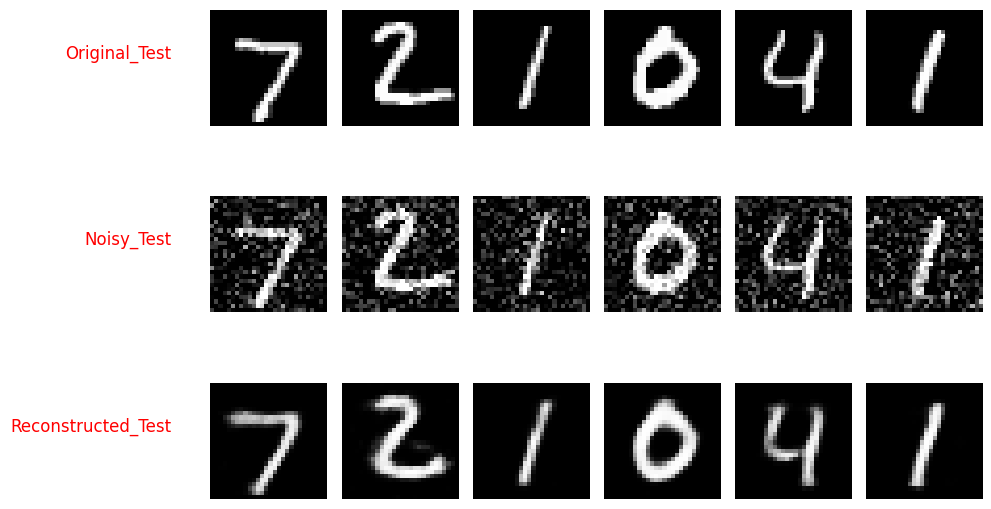

In [35]:
plt.figure(figsize=(10, 6))
row_titles = ['Original_Test', 'Noisy_Test', 'Reconstructed_Test']

for i in range(6):
    # Original image
    ax = plt.subplot(3, 6, i + 1)
    if i == 0:
        ax.text(-10, 10, row_titles[0], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(x_test[i].reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

    # Noisy image
    ax = plt.subplot(3, 6, i + 7)
    if i == 0:
        ax.text(-10, 10, row_titles[1], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, 6, i + 13)
    if i == 0:
        ax.text(-10, 10, row_titles[2], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(np.array(x_test_reconstr_10.detach().numpy()[i]).reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [32]:
# ANOTHER APPROACHES
r = 10
torch_encoder_diff = torch.nn.Sequential(
    torch.nn.Linear(784, 128),
    torch.nn.Hardtanh(),
    torch.nn.Linear(128, 64),
    torch.nn.Hardtanh(),
    torch.nn.Linear(64, r),
)

torch_decoder_diff = torch.nn.Sequential(
    torch.nn.Linear(r,  64),
    torch.nn.Sigmoid(),
    torch.nn.Linear(64, 784),
    torch.nn.ReLU()
)

AE_torch_diff = torch.nn.Sequential(
    torch_encoder_diff,
    torch_decoder_diff
)

In [33]:
optimizer_diff = torch.optim.Adam(AE_torch_diff.parameters())

n_epochs = 6
for epoch in range(n_epochs):
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer_diff.zero_grad()
        outputs = AE_torch_diff(inputs)
        loss = loss_torch(outputs, targets)
        loss.backward()
        optimizer_diff.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.6f}")
# greater than 0.016538

Epoch 1/6, Loss: 0.058436
Epoch 2/6, Loss: 0.043474
Epoch 3/6, Loss: 0.041233
Epoch 4/6, Loss: 0.039601
Epoch 5/6, Loss: 0.038256
Epoch 6/6, Loss: 0.037437


In [37]:
# ANOTHER APPROACHES
r = 8
torch_encoder_diff = torch.nn.Sequential(
    torch.nn.Linear(784, 64),
    torch.nn.ELU(),
    torch.nn.Linear(64, r),
)

torch_decoder_diff = torch.nn.Sequential(
    torch.nn.Linear(r,  64),
    torch.nn.Sigmoid(),
    torch.nn.Linear(64, 784),
    torch.nn.ReLU()
)

AE_torch_diff = torch.nn.Sequential(
    torch_encoder_diff,
    torch_decoder_diff
)

In [38]:
optimizer_diff = torch.optim.Adam(AE_torch_diff.parameters())

n_epochs = 6
for epoch in range(n_epochs):
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer_diff.zero_grad()
        outputs = AE_torch_diff(inputs)
        loss = loss_torch(outputs, targets)
        loss.backward()
        optimizer_diff.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.6f}")
# greater than 0.016538

Epoch 1/6, Loss: 0.060529
Epoch 2/6, Loss: 0.048234
Epoch 3/6, Loss: 0.044428
Epoch 4/6, Loss: 0.042119
Epoch 5/6, Loss: 0.040260
Epoch 6/6, Loss: 0.038789


In [39]:
# THE "BEST" APPROACH
r = 20
torch_encoder_diff = torch.nn.Sequential(
    torch.nn.Linear(784, 512),
    # torch.nn.Softmax(dim=1),
    torch.nn.ELU(alpha = 0.5),
    torch.nn.Linear(512, 128),
    torch.nn.Sigmoid(),
    torch.nn.Linear(128, r),
    torch.nn.Hardtanh(),

)

torch_decoder_diff = torch.nn.Sequential(
    torch.nn.Linear(r,  128),
    torch.nn.PReLU(init = 0.5),
    torch.nn.Linear(128, 256),# ELU
    torch.nn.ELU(alpha=4),
    torch.nn.Linear(256, 784),
    torch.nn.ELU(alpha=0.2),
    torch.nn.PReLU(init = 0.5),
)

AE_torch_diff = torch.nn.Sequential(
    torch_encoder_diff,
    torch_decoder_diff
)

In [40]:
optimizer_diff = torch.optim.Adam(AE_torch_diff.parameters())

n_epochs = 6
for epoch in range(n_epochs):
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer_diff.zero_grad()
        outputs = AE_torch_diff(inputs)
        loss = loss_torch(outputs, targets)
        loss.backward()
        optimizer_diff.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.6f}")


x_train_torch_encoded_diff = torch_encoder_diff(x_train_noisy_tensor).detach().numpy()
x_train_torch_reconstr_diff = AE_torch_diff(x_train_noisy_tensor)
x_train_torch_reconstr_np_diff = x_train_torch_reconstr_diff.detach().numpy()
# less than 0.016538

Epoch 1/6, Loss: 0.027361
Epoch 2/6, Loss: 0.016262
Epoch 3/6, Loss: 0.014532
Epoch 4/6, Loss: 0.013530
Epoch 5/6, Loss: 0.012865
Epoch 6/6, Loss: 0.012349


In [41]:
noise_level = 0.40

x_train_noisy = x_train + noise_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy_tensor = torch.tensor(x_train_noisy, dtype=torch.float32)
x_test_noisy_tensor = torch.tensor(x_test_noisy, dtype=torch.float32)

In [42]:
# x_train_torch_encoded_noiser = torch_encoder_diff(x_train_noisy_tensor).detach().numpy()
x_train_reconstr_noiser  = AE_torch_diff(x_train_noisy_tensor)
x_test_reconstr_noiser = AE_torch_diff(x_test_noisy_tensor)

print(f"MSE train: {loss_torch(x_train_tensor, x_train_reconstr_noiser)}")
print(f"MSE test: {loss_torch(x_test_tensor, x_test_reconstr_noiser)}")

MSE train: 0.015930648893117905
MSE test: 0.01581570692360401


In [48]:
x_train_reconstr_10_noiser = AE_torch_large_10(x_train_noisy_tensor)
x_test_reconstr_10_noiser = AE_torch_large_10(x_test_noisy_tensor)

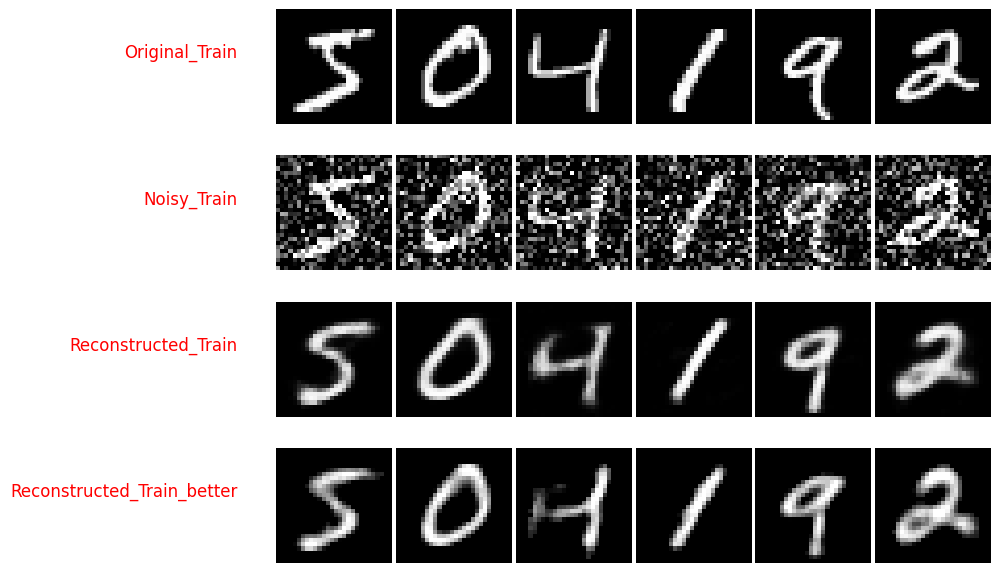

In [49]:
plt.figure(figsize=(10, 6))
row_titles = ['Original_Train', 'Noisy_Train', 'Reconstructed_Train', 'Reconstructed_Train_better']

for i in range(6):
    # Original image
    ax = plt.subplot(4, 6, i + 1)
    if i == 0:
        ax.text(-10, 10, row_titles[0], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(x_train[i].reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

    # Noisy image
    ax = plt.subplot(4, 6, i + 7)
    if i == 0:
        ax.text(-10, 10, row_titles[1], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(x_train_noisy[i].reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

    # Reconstructed image
    ax = plt.subplot(4, 6, i + 13)
    if i == 0:
        ax.text(-10, 10, row_titles[2], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(np.array(x_train_reconstr_10_noiser.detach().numpy()[i]).reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

    ax = plt.subplot(4, 6, i + 19)
    if i == 0:
        ax.text(-10, 10, row_titles[3], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(np.array(x_train_reconstr_noiser.detach().numpy()[i]).reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

plt.tight_layout()
plt.show()

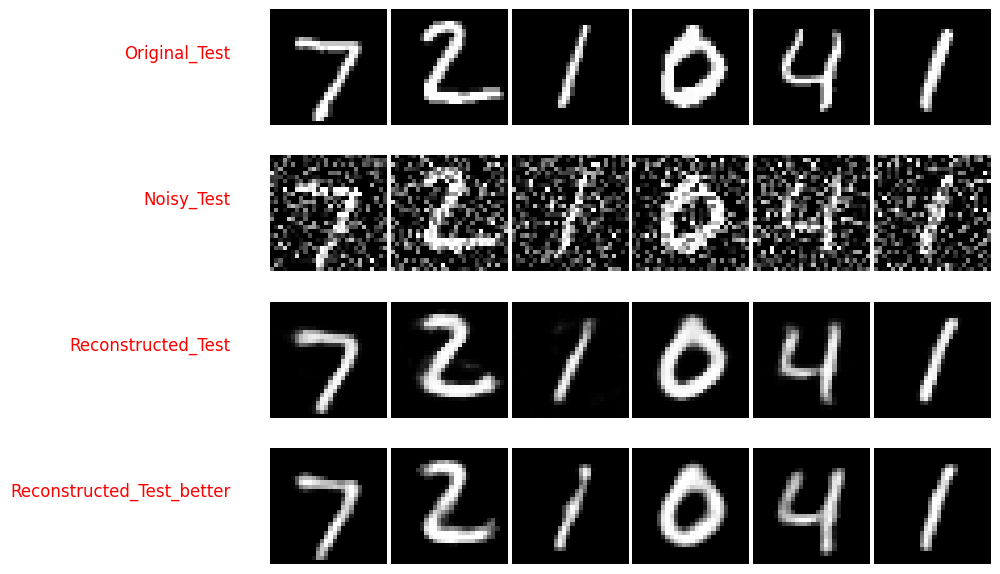

In [51]:
plt.figure(figsize=(10, 6))
row_titles = ['Original_Test', 'Noisy_Test', 'Reconstructed_Test', 'Reconstructed_Test_better']

for i in range(6):
    # Original image
    ax = plt.subplot(4, 6, i + 1)
    if i == 0:
        ax.text(-10, 10, row_titles[0], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(x_test[i].reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

    # Noisy image
    ax = plt.subplot(4, 6, i + 7)
    if i == 0:
        ax.text(-10, 10, row_titles[1], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

    # Reconstructed image
    ax = plt.subplot(4, 6, i + 13)
    if i == 0:
        ax.text(-10, 10, row_titles[2], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(np.array(x_test_reconstr_10_noiser.detach().numpy()[i]).reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

    ax = plt.subplot(4, 6, i + 19)
    if i == 0:
        ax.text(-10, 10, row_titles[3], color='red', fontsize=12, va='center', ha='right', transform=ax.transData)
    ax.imshow(np.array(x_test_reconstr_noiser.detach().numpy()[i]).reshape(28, 28), cmap="gray", vmin=0, vmax=1)
    ax.axis('off')

plt.tight_layout()
plt.show()